# Import the packages

In [1]:
import os

from fastai.vision.all import *
from fastai.vision import *

import pandas as pd

# Convert the dataset into Imagenet style

In [2]:
DATASET_PATH = './train'

In [3]:
class_names = []
for folder_name in os.listdir(DATASET_PATH):
    class_names.append(folder_name)

In [4]:
class_names

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [5]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{DATASET_PATH}/{class_name}')
    for image_name in image_names:
        image_path = f'{DATASET_PATH}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)
    

In [6]:
df = pd.DataFrame(
    {
        'name': image_paths,
        'label': labels
    }
)

In [7]:
df.head()

,name,label
0,./train/Mild/0024cdab0c1e.png,0
1,./train/Mild/00cb6555d108.png,0
2,./train/Mild/0124dffecf29.png,0
3,./train/Mild/01b3aed3ed4c.png,0
4,./train/Mild/0369f3efe69b.png,0


In [8]:
df.tail()

,name,label
3657,./train/Severe/f9156aeffc5e.png,4
3658,./train/Severe/fb61230b99dd.png,4
3659,./train/Severe/fcc6aa6755e6.png,4
3660,./train/Severe/fda39982a810.png,4
3661,./train/Severe/fe0fc67c7980.png,4


In [9]:
df.to_csv(
    path_or_buf=f'{DATASET_PATH}/labels.csv',
    index=False
)

# Load the data

In [10]:
dls = ImageDataLoaders.from_folder(
    path=DATASET_PATH,
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    valid_pct=0.2
)

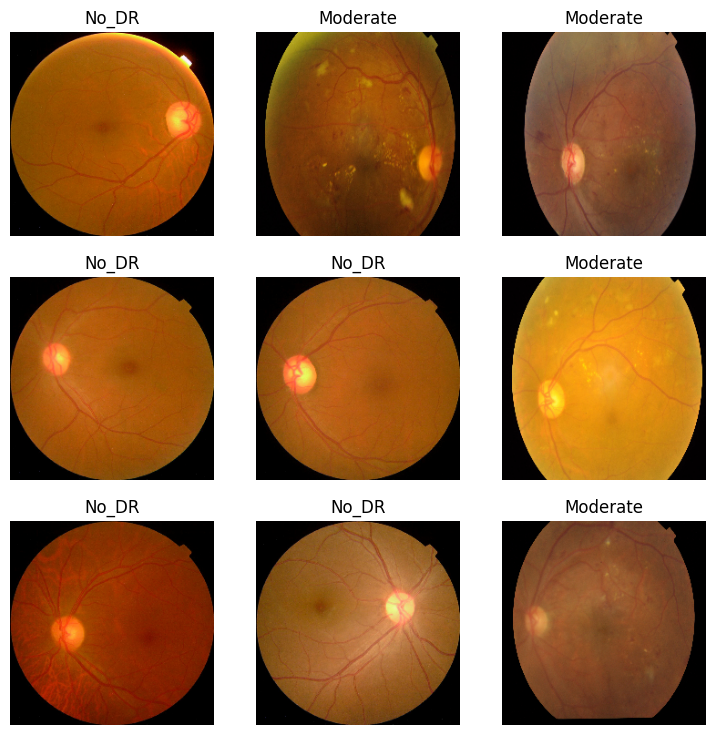

In [11]:
dls.show_batch()

# Create a model

In [19]:
model = vision_learner(
    dls=dls,
    arch=models.resnet101,
    metrics=[accuracy, error_rate]
)

C:\Users\amit\.conda\envs\envtensor\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\amit\.conda\envs\envtensor\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to C:\Users\amit/.cache\torch\hub\checkpoints\resnet101-63fe2227.pth
100%|██████████| 171M/171M [05:49<00:00, 512kB/s]    


In [20]:
model.fine_tune(
    epochs=5
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.180450,0.825890,0.722678,0.277322,40:12


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.809947,0.567309,0.793716,0.206284,43:03
1,0.708690,0.672716,0.816940,0.183060,43:35
2,0.543413,0.631598,0.834699,0.165301,43:48
3,0.357120,0.509238,0.834699,0.165301,44:03
4,0.126730,0.497084,0.863388,0.136612,43:08


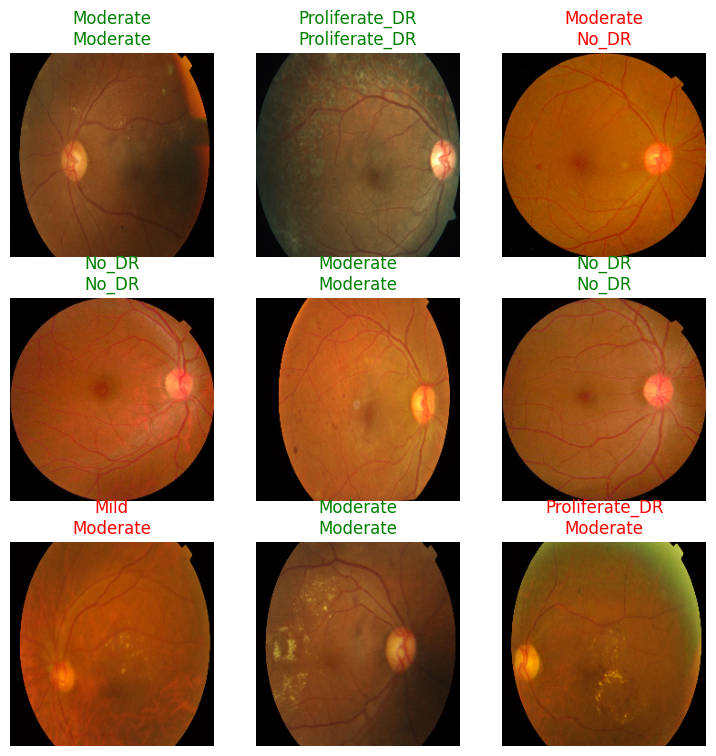

In [21]:
model.show_results()

# Save the model

In [25]:
model.export('fastapi_resnet101.pkl')

# Load the model

In [26]:
new_model = load_learner(f'{DATASET_PATH}/fastapi_resnet101.pkl')

# Predict from the loaded model

In [27]:
new_model.predict(
    item='./train/Mild/01b3aed3ed4c.png'
)

('Mild',
 tensor(0),
 tensor([9.0362e-01, 8.5271e-02, 3.2884e-04, 1.0334e-02, 4.4371e-04]))